## Getting started with Bruges

You need to install Bruges in order for this notebook to run. You can clone the repository on GitHub or if you have pip installed, in a terminal you can do,

<code>pip install bruges </code> 

## AVO Calculations

In [1]:
import bruges as b

|  | Vp [m/s] | Vs [m/s] | Density [kg/m3] |  
|-------------|----------|----------|----------|
| upper layer | 3300 | 1500 | 2400 |
| lower layer | 3050 | 1400 | 2075 |

In [2]:
# Upper layer rock properties
vp1 = 3300.0
vs1 = 1500.0
rho1 = 2400.0

# Lower layer rock properties
vp2 = 3050.0
vs2 = 1400.0
rho2 = 2075.0

In [3]:
b.reflection.akirichards(vp1, vs1, rho1, vp2, vs2, rho2, theta1=0)

-0.11199577706417983

In [4]:
b.reflection.akirichards(vp1, vs1, rho1, vp2, vs2, rho2, theta1=30)

-0.096520698009549363

We can get the four individual terms of the linear approximation

In [5]:
W, X, Y, Z = b.reflection.akirichards(vp1, vs1, rho1, vp2, vs2, rho2, theta1=30, terms=True)
print ("W-term",W)
print ("X-term",X)
print ("Y-term",Y)
print ("Z-term",Z)

W-term -0.07262569832402235
X-term 0.0140216281659
Y-term -0.0512315957118
Z-term 0.0133149678604


And check that it matches the sum.

In [6]:
W + X + Y + Z == b.reflection.akirichards(vp1, vs1, rho1, vp2, vs2, rho2, theta1=30)

True

We can pass in a list of angles,

In [7]:
b.reflection.akirichards(vp1, vs1, rho1, vp2, vs2, rho2, theta1=[0,10,20,30])

array([-0.11199578, -0.10982911, -0.10398651, -0.0965207 ])

In [8]:
import numpy as np

Create an array of angles from 0 to 70, incremented by 1,

In [9]:
theta = np.arange(0, 70)

Create some variables for our data so we don't have to type so much

In [10]:
rc0 = b.reflection.akirichards(vp1, vs1, rho1, vp2, vs2, rho2, theta1=0)
rc30 = b.reflection.akirichards(vp1, vs1, rho1, vp2, vs2, rho2, theta1=30)
rclist = b.reflection.akirichards(vp1, vs1, rho1, vp2, vs2, rho2, theta1=[0,10,20,30])
rcrange = b.reflection.akirichards(vp1, vs1, rho1, vp2, vs2, rho2, theta)

Compare the two-term Aki-Richards approximation with the full Zoeprittz equation for a interface between two rocks:

In [11]:
# call the Zoeppritz equation on the same inputs
rcz = b.reflection.zoeppritz(vp1, vs1, rho1, vp2, vs2, rho2, theta)

Put all this data on an AVO plot:

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Evan/anaconda/lib/python3.4/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


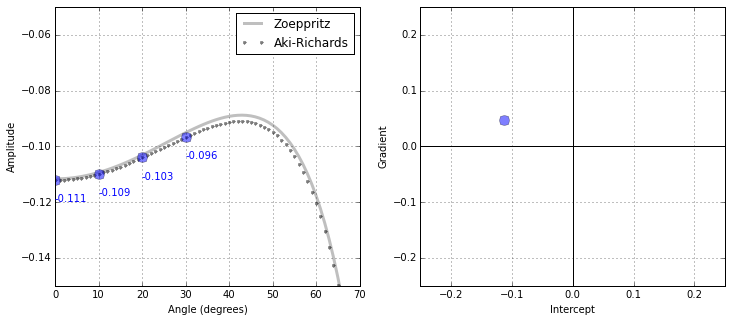

In [13]:
# some style parameters 
font = {'family' : 'monospace',
        'color'  : 'blue',
        'weight' : 'normal',
        'size'   : 14}
box = dict(facecolor='white', edgecolor='white', alpha=0.5)
nsz = 10

fig = plt.figure(figsize=(12,5))

# AVO plot
ax1 = fig.add_subplot(121)
# reflection coefficents from Zoeppritz equation
ax1.plot(theta, rcz, 'k', lw=3, alpha=0.25, label='Zoeppritz')
# reflection coefficents from Aki-Richards approximation
ax1.plot(theta, rcrange, 'k.', lw=3, alpha=0.5, label='Aki-Richards')
# reflection coeffient of our sequence of four angles
ax1.plot([0,10,20,30], rclist, 'bo', ms=10, alpha = 0.5)
# reflection coeffient at normal incidence
# ax1.text(0,-0.107, 'rc0', ha='center', fontdict=font, bbox=box)
# reflection coeffient at 30 deg.
# ax1.text(30,-0.092, 'rc30', ha='center', fontdict=font, bbox=box)

# Putting some annotations on the plot
ax1.text(0,-0.11699578, '-0.111', ha='left', va='top', fontdict={'size': nsz, 'color': 'blue'})
ax1.text(10,-0.1148291, '-0.109', ha='left', va='top', fontdict={'size': nsz, 'color': 'blue'})
ax1.text(20,-0.1089865, '-0.103', ha='left', va='top', fontdict={'size': nsz, 'color': 'blue'})
ax1.text(30,-0.1015207, '-0.096', ha='left', va='top', fontdict={'size': nsz, 'color': 'blue'})
ax1.legend()
ax1.set_ylim((-0.15, -0.05))
ax1.set_xlabel('Angle (degrees)')
ax1.set_ylabel('Amplitude')
ax1.grid()

# Intercept-Gradient crossplot
ax2 = fig.add_subplot(122)
ax2.plot(rc0, (rc30-rc0)*(90/30), 'bo', ms=10, alpha = 0.5)

# Put spines for x and y axis
ax2.axvline(0, color='k')
ax2.axhline(0, color='k')
# set square axes limits
mx = 0.25
ax2.set_xlim((-mx, mx))
ax2.set_ylim((-mx, mx))
# Label the axes
ax2.set_xlabel('Intercept')
ax2.set_ylabel('Gradient')


ax2.grid()
fig.show()

## Elastic moduli calculations

Say I want to compute the Lamé parameters &#955; and &#181;, from V<sub>P</sub>, V<sub>S</sub>, and Density. As long as my inputs are in SI units, I can insert these values directly:

|  | Vp [m/s] | Vs [m/s] | Density [kg/m3] |
|-------------|----------|----------|----------|
| upper layer | 3300 | 1500 | 2400 |
| lower layer | 3050 | 1400 | 2075 |

In [14]:
# Upper layer rock properties
b.rockphysics.lam(vp1, vs1, rho1)
b.rockphysics.mu(vp1, vs1, rho1)

# Lower layer rock properties
b.rockphysics.lam(vp2, vs2, rho2)
b.rockphysics.mu(vp2, vs2, rho2)

4067000000.0

We can print these values in terms of GPa (x10<sup>9</sup> Pa)

In [15]:
units = '[GPa]'
indent = '    '
print ('Upper layer: \n', 
       indent,  'lambda', units, ':', b.rockphysics.lam(vp1, vs1, rho1) / 1e9, '\n', 
       indent, 'Mu', units,': ', b.rockphysics.mu(vp1, vs1, rho1) / 1e9,'\n',
       'Lower layer: \n', 
       indent, 'lambda', units,':', b.rockphysics.lam(vp2, vs2, rho2) / 1e9, '\n', 
       indent, 'Mu', units,': ', b.rockphysics.mu(vp2, vs2, rho2) / 1e9)

Upper layer: 
      lambda [GPa] : 15.336 
      Mu [GPa] :  5.4 
 Lower layer: 
      lambda [GPa] : 11.1686875 
      Mu [GPa] :  4.067


|  | Vp [m/s] | Vs [m/s] | Density [kg/m3] |  Lambda [GPa] | Mu [GPa] |
|-------------|----------|----------|----------|----------|----------|
| upper layer | 3300 | 1500 | 2400 | 15.3 | 5.4 |
| lower layer | 3050 | 1400 | 2075 | 11.2 | 4.1 |

## Rock property analysis and crossplotting

In [16]:
from striplog import Well

(You might need to install Striplog in order to load well log data from an LAS file. However you could use your own data 

In [17]:
fname = 'P-132_synth.las'
well = Well(fname)

# cropp the log to a first and last sample
first = 1232 
last = 26000 

z = well.data['DEPT'][first:last]
dt = well.data['Sonic_despiked'][first:last]
rho = well.data['RHOB_despiked'][first:last]
tt = well.data['two-waytime'][first:last]

In [18]:
vp =  1e6 / (3.28084 * dt)        # SI units
vs = (vp - 1360)/1.16             # SI units
rho *= 1000      # SI units

In [19]:
lmlog = b.rockphysics.lam(vp, vs, rho)
mulog = b.rockphysics.mu(vp, vs, rho)

/Users/Evan/anaconda/lib/python3.4/site-packages/bruges/rockphysics/moduli.py:202: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if None not in (vp, vs, rho):
/Users/Evan/anaconda/lib/python3.4/site-packages/bruges/rockphysics/moduli.py:163: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if None not in (vs, rho):


Create a crossplot:

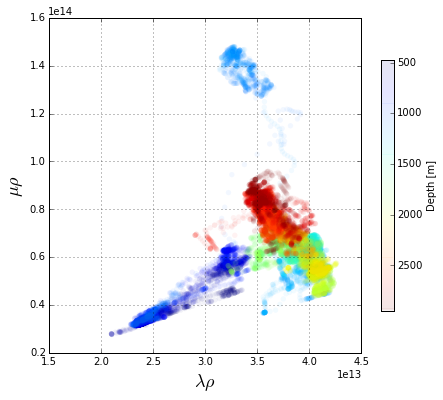

In [20]:
plt.figure(figsize=(7,6))
plt.scatter(lmlog*rho, mulog*rho, s=30, c=z, 
            edgecolor='none',  # marker edge color
            alpha = 0.05)

# Give the plot a colorbar
cb = plt.colorbar(shrink=0.75)
cb.ax.invert_yaxis()  # put shallow colors at the top
cb.set_ticks([500,1000,1500,2000,2500,3000])
cb.set_label("Depth [m]")

# Give the plot some annotation
plt.xlabel(r'$\lambda \rho$', size=18)
plt.ylabel(r'$\mu \rho$', size=18)
plt.grid()

## Anisotropy calculations and Backus averaging

In [21]:
lb = 60       # Backus averaging length in metres
dz = 0.1524   # sample rate of the log in metres

In [22]:
vp0, vs0 = b.rockphysics.backus(vp, vs, rho, lb, dz)

/Users/Evan/anaconda/lib/python3.4/site-packages/bruges/rockphysics/moduli.py:202: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if None not in (vp, vs, rho):
/Users/Evan/anaconda/lib/python3.4/site-packages/bruges/rockphysics/moduli.py:163: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if None not in (vs, rho):


/Users/Evan/anaconda/lib/python3.4/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


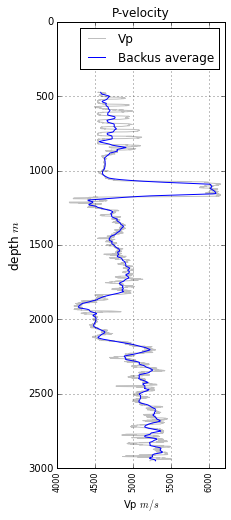

In [23]:
fs = 8  # control the fontsize

fig = plt.figure(figsize=(3,8))
ax1 = plt.subplot(111)   # Vp log
# plot the original Vp log
ax1.plot(vp, z, 'k', alpha=0.25, label='Vp')
# plot the Backus averages Vp log
ax1.plot(vp0, z, 'b', label='Backus average')

# Do some plot annotations
ax1.set_title('P-velocity')
ax1.set_ylabel(r'depth $m$', size=12)
ax1.invert_yaxis()
ax1.set_xlim((4000,6200))
ax1.set_xlabel(r'Vp $m/s$')
ax1.grid()
ax1.legend()
labels = ax1.get_xticklabels() 
for label in labels: 
    label.set_rotation(90) 
    label.set_fontsize(fs)

# fig.savefig('images/VpBackusAvg.png')
fig.show()